# EC2 - fluência

In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fcm = 28
rh = 50
h0 = 100
t0 = 5
a3 = max(1.0, math.sqrt(35.0/fcm))

a3

1.118033988749895

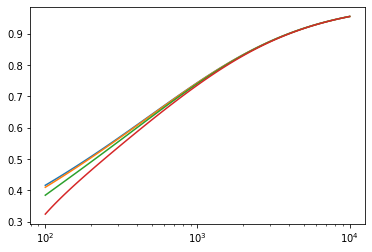

In [7]:
t = np.logspace(2, 4, 100)
def beta_cc(tt, bh, to):
    a = math.pow((tt-to)/(bh+tt-to), 0.3)
    return a

betah = max(1500*a3, 1.5*(1.0+math.pow(0.012*rh,18))*h0+250*a3)
betacc = np.vectorize(beta_cc)
for tt0 in [5, 10, 28, 60]:
    bcc = betacc(t, betah, tt0)
    #fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    plt.xscale('log')
    plt.plot(t, bcc)
